## Assigment 2

In this weeks assignment you will gain practical experience in working with both data and statistical models, the most important skillset you should retain from this course. You can solve the assignment in your programming language of choice, but should hand in the solution as a runnable file (e.g. an R-script, a Python-script, a Quarto-file, a Jupyter notebook etc). Ensure that your file can be run from top to bottom without any modifications, which is not necessarily the case if you tend to run the script line-by-line and jump back and forth while programming. If you are unable to solve any of the tasks contact me by email and I can help out. If you are unable to do so before the deadline, reflect and write a brief summary on why you think you are seeing the problems you are seeing.

### Exercise 1: Preparations

    Download the Auto.csv dataset from the ISLP website (https://www.statlearning.com/resources-python or https://www.statlearning.com/resources-second-edition). This you can do outside Python or R, but from here on out the remainder of the solution should be programmed.
    Read the Auto.csv-dataset into memory.

    In the horsepower-column, some values are missing. These are encoded with ‘?’. Remove these rows from the dataset.
    
    Create a new column ‘muscle’. This column should contain a 1 for all muscle cars (e.g. cars that have above average horsepower) and 0 for the rest. (HINT: To help you out I have calculated that you should end up with approximately 148 muscle cars and 244 others (assuming that you have already removed the rows with horsepower=’?’ above)).

    Split the dataset into a training set and a test set, by randomly drawing 80% of the rows for the former and 20% of the rows for the latter. We will get into why this is a good idea in later lectures, but its good practice to start with evaluating the models in held-out data from the get go.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# 1) Read dataset
auto_df = pd.read_csv('Auto.csv')

# 2) Remove rows where horsepower is '?'
auto_df = auto_df[auto_df['horsepower'] != '?']
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'])

# 3) Muscle column (1 if horsepower > average, if not: 0)
auto_df['muscle'] = (auto_df['horsepower'] > auto_df['horsepower'].mean()).astype(int)

# Verify counts
print(f"Muscle cars: {sum(auto_df['muscle'] == 1)}")
print(f"Regular cars: {sum(auto_df['muscle'] == 0)}")

# 4) Split into 80% training and 20% test
train_df, test_df = train_test_split(auto_df, test_size=0.2, random_state=42)

print(f"Training set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")

Muscle cars: 148
Regular cars: 244
Training set: 313 rows
Test set: 79 rows


### Exercise 2: Simple linear regression

    Fit a simple linear regression model using horsepower as the predictor and mpg as the outcome using the training data.

    Create a scatter plot with horsepower on the x-axis and mpg on the y-axis using the testing data.
    Plot the regression line found by the model in the plot (Hint: To achieve this you need to find the intercept and the single coefficient of the model, generate predictions or use built-in plotting functionality).

    Use the model to generate predictions for the training set. Calculate and report the mean absolute error (MAE) of these predictions.

    Use the model to generate predictions for the test set. Calculate and report the MAE of the predictions.

Training MAE: 3.85
Test MAE: 3.78


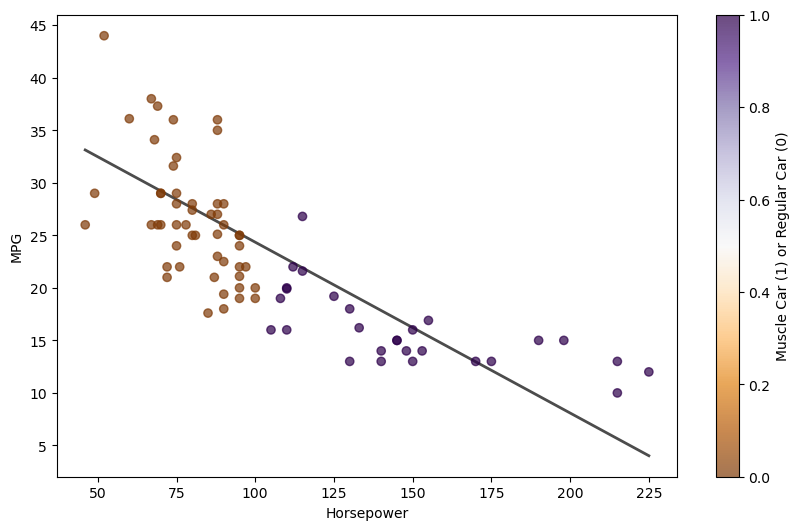

In [3]:
# 1) Fit linear reg model (horsepower + mpg)
X_train = train_df[['horsepower']]
y_train = train_df['mpg']

X_test = test_df[['horsepower']]
y_test = test_df['mpg']

model = LinearRegression()
model.fit(X_train, y_train)

# 2) Scatterplot (x=horsepower, y=mpg), color by muscle, and add regression line
plt.figure(figsize=(10, 6))
plt.scatter(test_df['horsepower'], test_df['mpg'], c=test_df['muscle'], cmap='PuOr', alpha=0.7, zorder=2)
plt.colorbar(label='Muscle Car (1) or Regular Car (0)')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
hp_range = np.linspace(test_df['horsepower'].min(), test_df['horsepower'].max(), 100)
hp_range_df = pd.DataFrame(hp_range, columns=['horsepower'])
mpg_pred = model.predict(hp_range_df)
plt.plot(hp_range, mpg_pred, color='black', linewidth=2, alpha=0.7, zorder=1)

# 3) Predictions for training set + MAE
predictions = model.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions)
print(f"Training MAE: {mae_train:.2f}")

# 4) Predictions for test set + MAE
predictions = model.predict(X_test)
mae_test = mean_absolute_error(y_test, predictions)
print(f"Test MAE: {mae_test:.2f}")

#### 5) Reflection
  - Is the training or testing MAE is lower? Does this match your expectation? What would be the general pattern we expect here (e.g. one is lower than the other, they are the same, ...), and why do we expect that?

The MAE for our training set was a bit higher (3.85) compared to our test set (3.78).
We would usually expect training MAE to be lower than test MAE, as the model is learning from the training set.
However, the training set is also 80% our data, and therefore increases the chance of containing more extreme values or containing more variance,
potentially resulting in a higher MAE. The test set, being only 20% of the data, might not fully capture all the variance present in the training set,
leading to a lower MAE.

### Exercise 3: Multivariate linear regression

    Fit a multivariate linear regression model using horsepower, weight, displacement, and year as predictors and mpg as the outcome.

    Print the intercept and coefficients of the model (these should be identifiable such that I’m able to deduce which coefficient belongs to which variable). What can you say about the relationship between mpg and the year-variable based on these?

    Use the model to generate predictions for the training set. Calculate and report the MAE of these predictions.

    Use the model to generate predictions for the test set. Calculate and report the MAE of the predictions.
    
    Reflection: Is the training MAE lower or higher than in the simple linear regression model? Does it have to be this way, or could it have been otherwise? What about the testing MAE?

In [27]:
# 1) Fit multivariate linear reg
X_train_multi = train_df[['horsepower', 'weight', 'displacement', 'year']]
y_train = train_df['mpg']
X_test_multi = test_df[['horsepower', 'weight', 'displacement', 'year']]
y_test = test_df['mpg']

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)

# 2) Print intercept and coefficients
print(f"Intercept: {model_multi.intercept_:.4f}")
for feature, coef in zip(['horsepower', 'weight', 'displacement', 'year'], model_multi.coef_):
    print(f"{feature}: {coef:.6f}")
print(f"\nYear coefficient is {model_multi.coef_[3]:.4f}: meaning that newer cars often have better MPG")

# 3) Predictions for training set + MAE
predictions_train_multi = model_multi.predict(X_train_multi)  # Changed variable name
mae_train = mean_absolute_error(y_train, predictions_train_multi)
print(f"Training MAE: {mae_train:.2f}")

# 4) Predictions for test set + MAE  
predictions_test_multi = model_multi.predict(X_test_multi)  # Changed variable name
mae_test = mean_absolute_error(y_test, predictions_test_multi)
print(f"Test MAE: {mae_test:.2f}")

Intercept: -14.0562
horsepower: -0.007559
weight: -0.006383
displacement: -0.001322
year: 0.757987

Year coefficient is 0.7580: meaning that newer cars often have better MPG
Training MAE: 2.67
Test MAE: 2.51


#### 5) Reflection
- Is the training MAE lower or higher than in the simple linear regression model? Does it have to be this way, or could it have been otherwise? What about the testing MAE?

The training MAE (2.67) is lower than in the simple linear regression model (3.85), and the test MAE (2.51) is also lower than in the simple linear reg model (3.78).

It has to be lower or equal when adding more predictors, as the linear reg minimizes the training error, and adding predictors can only improve (or maintain) the fit on on the training data.

The test MAE doesnt have to be lower, it could also be higher if the model overfits to the training data. In this case, it improved which suggests that the additional predictors capture real relationships in our data that help us generalize to new data

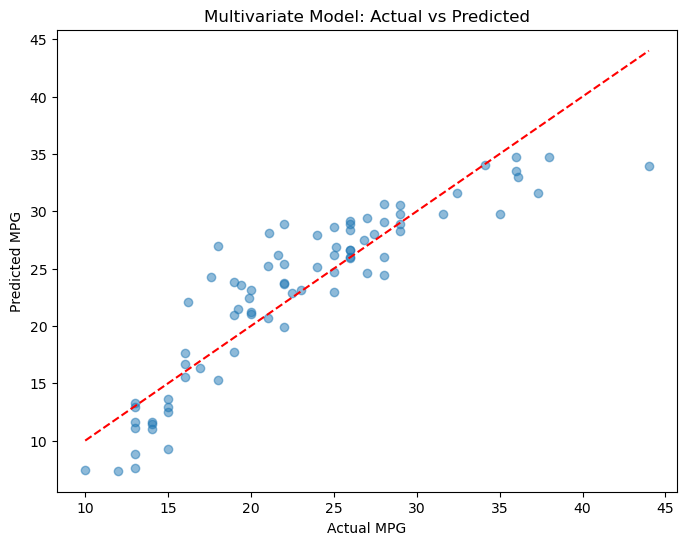

In [28]:
# Plot Multivariate Linear Regression for fun
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test_multi, alpha=0.5)  # Use predictions_test_multi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Multivariate Model: Actual vs Predicted')
plt.show()

### Exercise 4: Logistic regression

Exercise 4: Logistic regression

    Fit a logistic regression model using weight, displacement and year as predictors and our newly created muscle-column as the outcome.
    
    Why don’t we use horsepower as a predictor in this model?

    Use the model to generate predictions for the training set. Calculate and report the accuracy of these predictions.
    
    Use the model to generate predictions for the testing set. Calculate and report the accuracy of these predictions.

In [ ]:
# 1) Fit logistic reg
X_train_log = train_df[['weight', 'displacement', 'year']]
y_train_log = train_df['muscle']
X_test_log = test_df[['weight', 'displacement', 'year']]
y_test_log = test_df['muscle']

model_log = LogisticRegression(random_state=42)
model_log.fit(X_train_log, y_train_log)

# 2) Why not horsepower as predictor
print("We don't use horsepower because muscle is defined based on horsepower")
print("(muscle = 1 if horsepower > average). This would cause data leakage.\n")

# 3) Predictions for training set + accuracy
predictions_train = model_log.predict(X_train_log)
accuracy_train = accuracy_score(y_train_log, predictions_train)
print(f"Training Accuracy: {accuracy_train:.4f}")

# 4) Predictions for test set + accuracy
predictions_test = model_log.predict(X_test_log)
accuracy_test = accuracy_score(y_test_log, predictions_test)
print(f"Test Accuracy: {accuracy_test:.4f}")

We don't use horsepower because muscle is defined based on horsepower
(muscle = 1 if horsepower > average). This would cause data leakage.

Training Accuracy: 0.8626
Test Accuracy: 0.8861


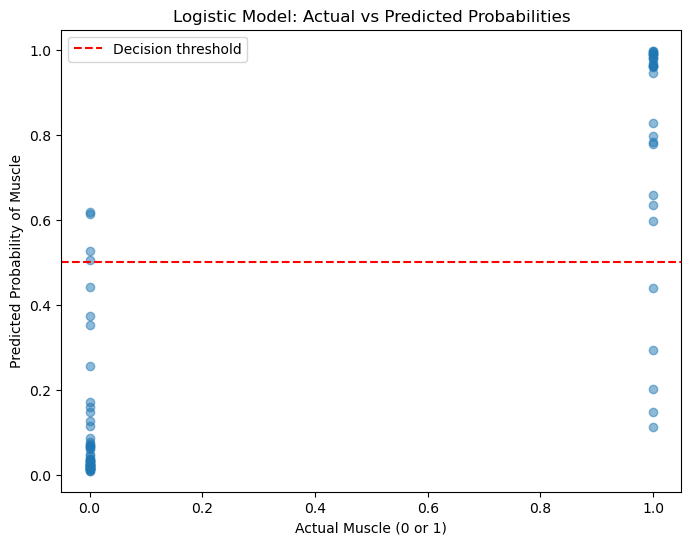

In [32]:
# Plot for fun
predictions_proba = model_log.predict_proba(X_test_log)[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, predictions_proba, alpha=0.5)
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision threshold')
plt.xlabel('Actual Muscle (0 or 1)')
plt.ylabel('Predicted Probability of Muscle')
plt.title('Logistic Model: Actual vs Predicted Probabilities')
plt.legend()
plt.show()